In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD

In [3]:
import tensorflow as tf


In [6]:
data = pd.read_excel("15min_dataset_pre_NN.xlsx", sheet_name="Sheet1")

data = data.astype(float)

data.dropna(inplace=True)

X = data.drop(columns=["Rozsev 0-5"]).values
y = data["Rozsev 0-5"].values

# Splitting the dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

scaler = MinMaxScaler(feature_range = (0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
# X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
# y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Reshape target tensors to have shape (batch_size, 1)
# y_train = y_train.view(y_train.shape[0], 1)
# y_val = y_val.view(y_val.shape[0], 1)
# y_test = y_test.view(y_test.shape[0], 1)

In [ ]:
data.shape

(501, 26)

In [7]:
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 25, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 25, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 25, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 25, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 25, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 25, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 25, 50)            1

In [ ]:
modelGRU.compile(optimizer='adam', loss='mean_absolute_error')
modelGRU.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
4/4 [==============================] - 11s 99ms/step - loss: 10.0081
Epoch 2/100
4/4 [==============================] - 0s 89ms/step - loss: 9.6136
Epoch 3/100
4/4 [==============================] - 0s 91ms/step - loss: 8.6725
Epoch 4/100
4/4 [==============================] - 0s 92ms/step - loss: 6.6333
Epoch 5/100
4/4 [==============================] - 0s 86ms/step - loss: 4.4099
Epoch 6/100
4/4 [==============================] - 0s 89ms/step - loss: 3.2313
Epoch 7/100
4/4 [==============================] - 0s 86ms/step - loss: 2.8032
Epoch 8/100
4/4 [==============================] - 0s 89ms/step - loss: 2.6348
Epoch 9/100
4/4 [==============================] - 0s 88ms/step - loss: 2.6321
Epoch 10/100
4/4 [==============================] - 0s 89ms/step - loss: 2.5783
Epoch 11/100
4/4 [==============================] - 0s 93ms/step - loss: 2.5631
Epoch 12/100
4/4 [==============================] - 0s 89ms/step - loss: 2.6264
Epoch 13/100
4/4 [=============================

In [ ]:
results = modelGRU.evaluate(X_test, y_test, batch_size=128)


1/1 [==============================] - 2s 2s/step - loss: 2.2499


In [ ]:
predictions = modelGRU.predict(X_test)

2/2 [==============================] - 2s 17ms/step


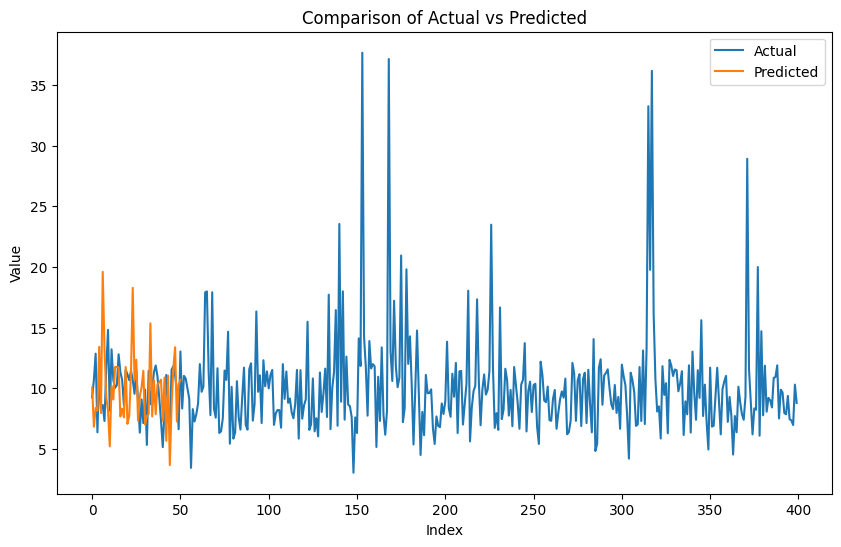

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_test, label='Predicted')
plt.title('Comparison of Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

2/2 [==============================] - 0s 16ms/step
